# Plot bias during test period for 2 seasons: Freezing and melting

In [1]:
import os
import netCDF4 as nc4
import numpy as np

from src.data_preparation import load_data
from src.utils import tardisml_utils

In [2]:
rootdir = tardisml_utils.get_rootdir()

# Import TOPAZ assimilated and Freerun

In [3]:
pca_dir = 'Leo/results/pca_i100-550_j150-629/'

In [4]:
filename = os.path.join(rootdir, pca_dir, f"sithick_TOPAZ4b23_2011_2022_FreeRun_adjSIC.nc")
sit_na, chrono_na = load_data.load_nc(filename, f'sithick', True)

# with assimilation
filename = os.path.join(rootdir, pca_dir, f"sithick_TOPAZ4b23_2011_2022_adjSIC.nc")
sit_a, chrono_a = load_data.load_nc(filename, f'sithick', True)

# Import Baseline

In [5]:
filename = '/scratch/project_465000269/edelleo1/Leo/results/pca_i100-550_j150-629/SIT_baseline_2011_2022_FreeRun.nc'

sit_bl, chrono_bl = load_data.load_nc(filename, 'sithick', X_only=True)

In [6]:
# Cap negative value at 0 m (while keeping nan)
sit0 = (sit_bl.where((0<sit_bl), -999)).where(np.isfinite(sit_bl))

In [7]:
sit_nan = (sit0.where((0<=sit0))).where(np.isfinite(sit0))  # exclude open ocean (SIT=0m)

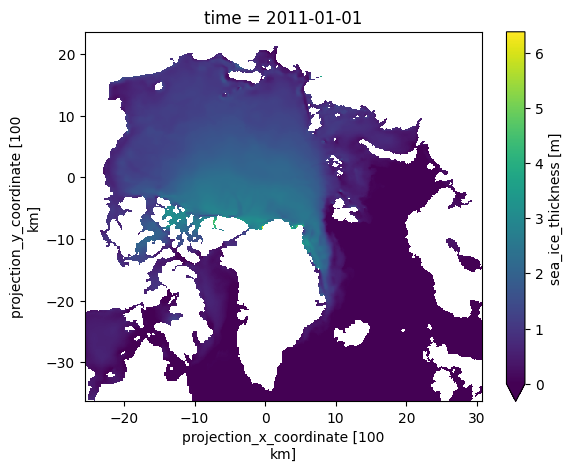

In [8]:
sit0.isel(time=0).plot(vmin=0)

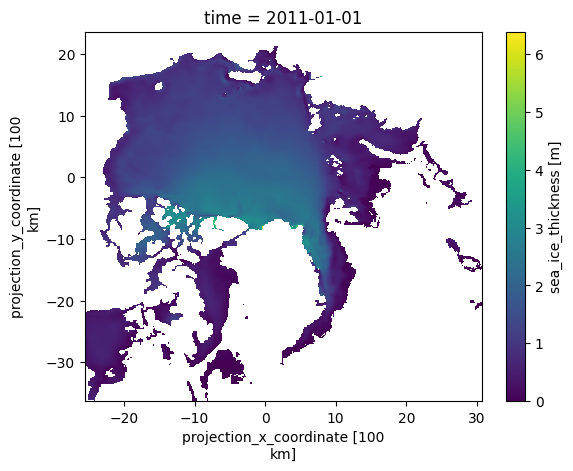

In [9]:
sit_nan.isel(time=0).plot()

# Import ML-adjusted 

In [10]:
# filename = '/scratch/project_465000269/edelleo1/Leo/results/lstm_230201-112355/ml/sit_gLSTM3_bk_2011_2019_01.nc'
filename = '/scratch/project_465000269/edelleo1/Leo/results/lstm_240523-170100/ml/sit_gLSTM3_bk_2011_2022_01.nc'

ml_model = 'LSTM'

sit, chrono = load_data.load_nc(filename, 'sit_ml', X_only=True)

# get bias over test period

In [11]:
sit = sit.isel(time=slice(None,1096))

sit_bl = sit_bl.isel(time=slice(None,1096))
sit_na = sit_na.isel(time=slice(None,1096))
sit_a = sit_a.isel(time=slice(None,1096))

In [12]:
chrono_t = chrono_a.iloc[:1096]

# monthly average / seasonal average

In [13]:
bias_fr_a = sit_na - sit_a
bias_ml_a = sit - sit_a

In [14]:
from src.feature_extraction import mean_error

In [15]:
# seasonal periods

In [16]:
bms_fr_a = mean_error.seasonally(chrono_t, bias_fr_a)
bms_ml_a = mean_error.seasonally(chrono_t, bias_ml_a)

In [17]:
# check baseline 
bias_bl_a = sit_bl - sit_a
bms_bl_a = mean_error.seasonally(chrono_t, bias_bl_a)


In [18]:
# freezing/melting periods
# October - April = freezing
# Mai - September = melting

In [19]:
from importlib import reload

In [20]:
reload(mean_error)

<module 'src.feature_extraction.mean_error' from '/users/edelleo1/tardis/tardis-ml/src/feature_extraction/mean_error.py'>

In [21]:
# check baseline 
bias_bl_a = sit_bl - sit_a

In [22]:
bms_fr_a = mean_error.seasonal2(chrono_t, bias_fr_a)
bms_ml_a = mean_error.seasonal2(chrono_t, bias_ml_a)
bms_bl_a = mean_error.seasonal2(chrono_t, bias_bl_a)


In [23]:
import numpy as np

In [24]:
import matplotlib.pyplot as plt

In [56]:
bins = np.arange(-.5,.6,.1)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-5.00000000e-01, -4.00000000e-01, -3.00000000e-01, -2.00000000e-01,
        -1.00000000e-01, -1.11022302e-16,  1.00000000e-01,  2.00000000e-01,
         3.00000000e-01,  4.00000000e-01,  5.00000000e-01]),
 <a list of 450 BarContainer objects>)

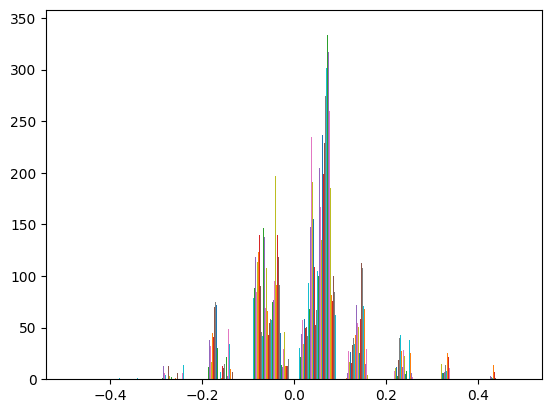

In [39]:
plt.hist(bms_ml_a.isel(dim_0=0), bins=bins)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-5.00000000e-01, -4.00000000e-01, -3.00000000e-01, -2.00000000e-01,
        -1.00000000e-01, -1.11022302e-16,  1.00000000e-01,  2.00000000e-01,
         3.00000000e-01,  4.00000000e-01,  5.00000000e-01]),
 <a list of 450 BarContainer objects>)

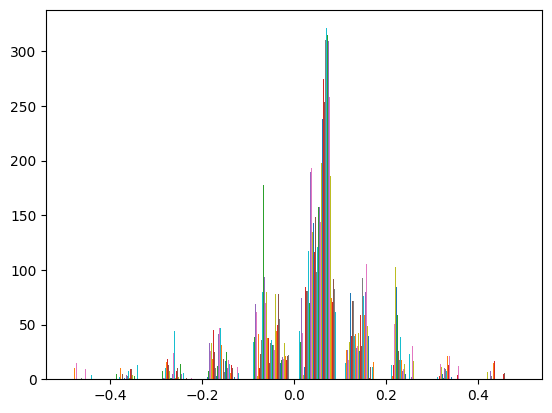

In [43]:
plt.hist(bms_bl_a.isel(dim_0=0), bins=bins)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-5.00000000e-01, -4.00000000e-01, -3.00000000e-01, -2.00000000e-01,
        -1.00000000e-01, -1.11022302e-16,  1.00000000e-01,  2.00000000e-01,
         3.00000000e-01,  4.00000000e-01,  5.00000000e-01]),
 <a list of 450 BarContainer objects>)

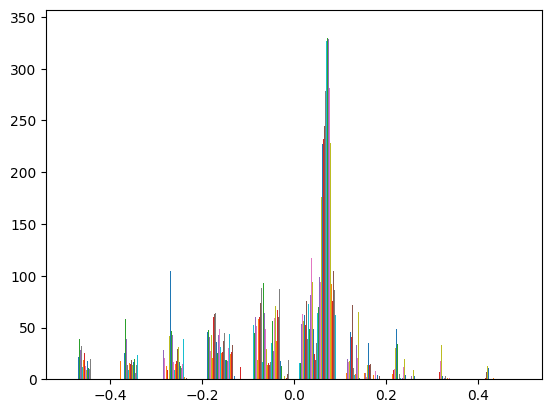

In [57]:
plt.hist(bms_fr_a.isel(dim_0=0), bins=bins)

In [42]:
for i in range(4):
    print('i:  ',i)
    print(bms_ml_a.isel(dim_0=i).mean().data)

i:   0
0.015200285454153091
i:   1
-0.022722655109512303
i:   2
-0.0065668672424895255
i:   3
0.034663304041968115


In [47]:
bms_fr_a.isel(dim_0=[0,1,2,3]).mean().data

array(-0.12088587)

In [44]:
for i in range(4):
    print('i:  ',i)
    print(bms_bl_a.isel(dim_0=i).mean().data)

i:   0
0.030720982979829448
i:   1
0.026139380584466142
i:   2
-0.011363923927856246
i:   3
0.06430141701765049


# Plot

In [25]:
import matplotlib.pyplot as plt
from src.utils import modif_plot
import numpy as np

In [27]:
odir = '/scratch/project_465000269/edelleo1/Leo/results/lstm_240523-170100/figures/'

Saved as : /scratch/project_465000269/edelleo1/Leo/results/lstm_240523-170100/figures/SITbias_frz_mlt_bl_fr_2011_2013.png


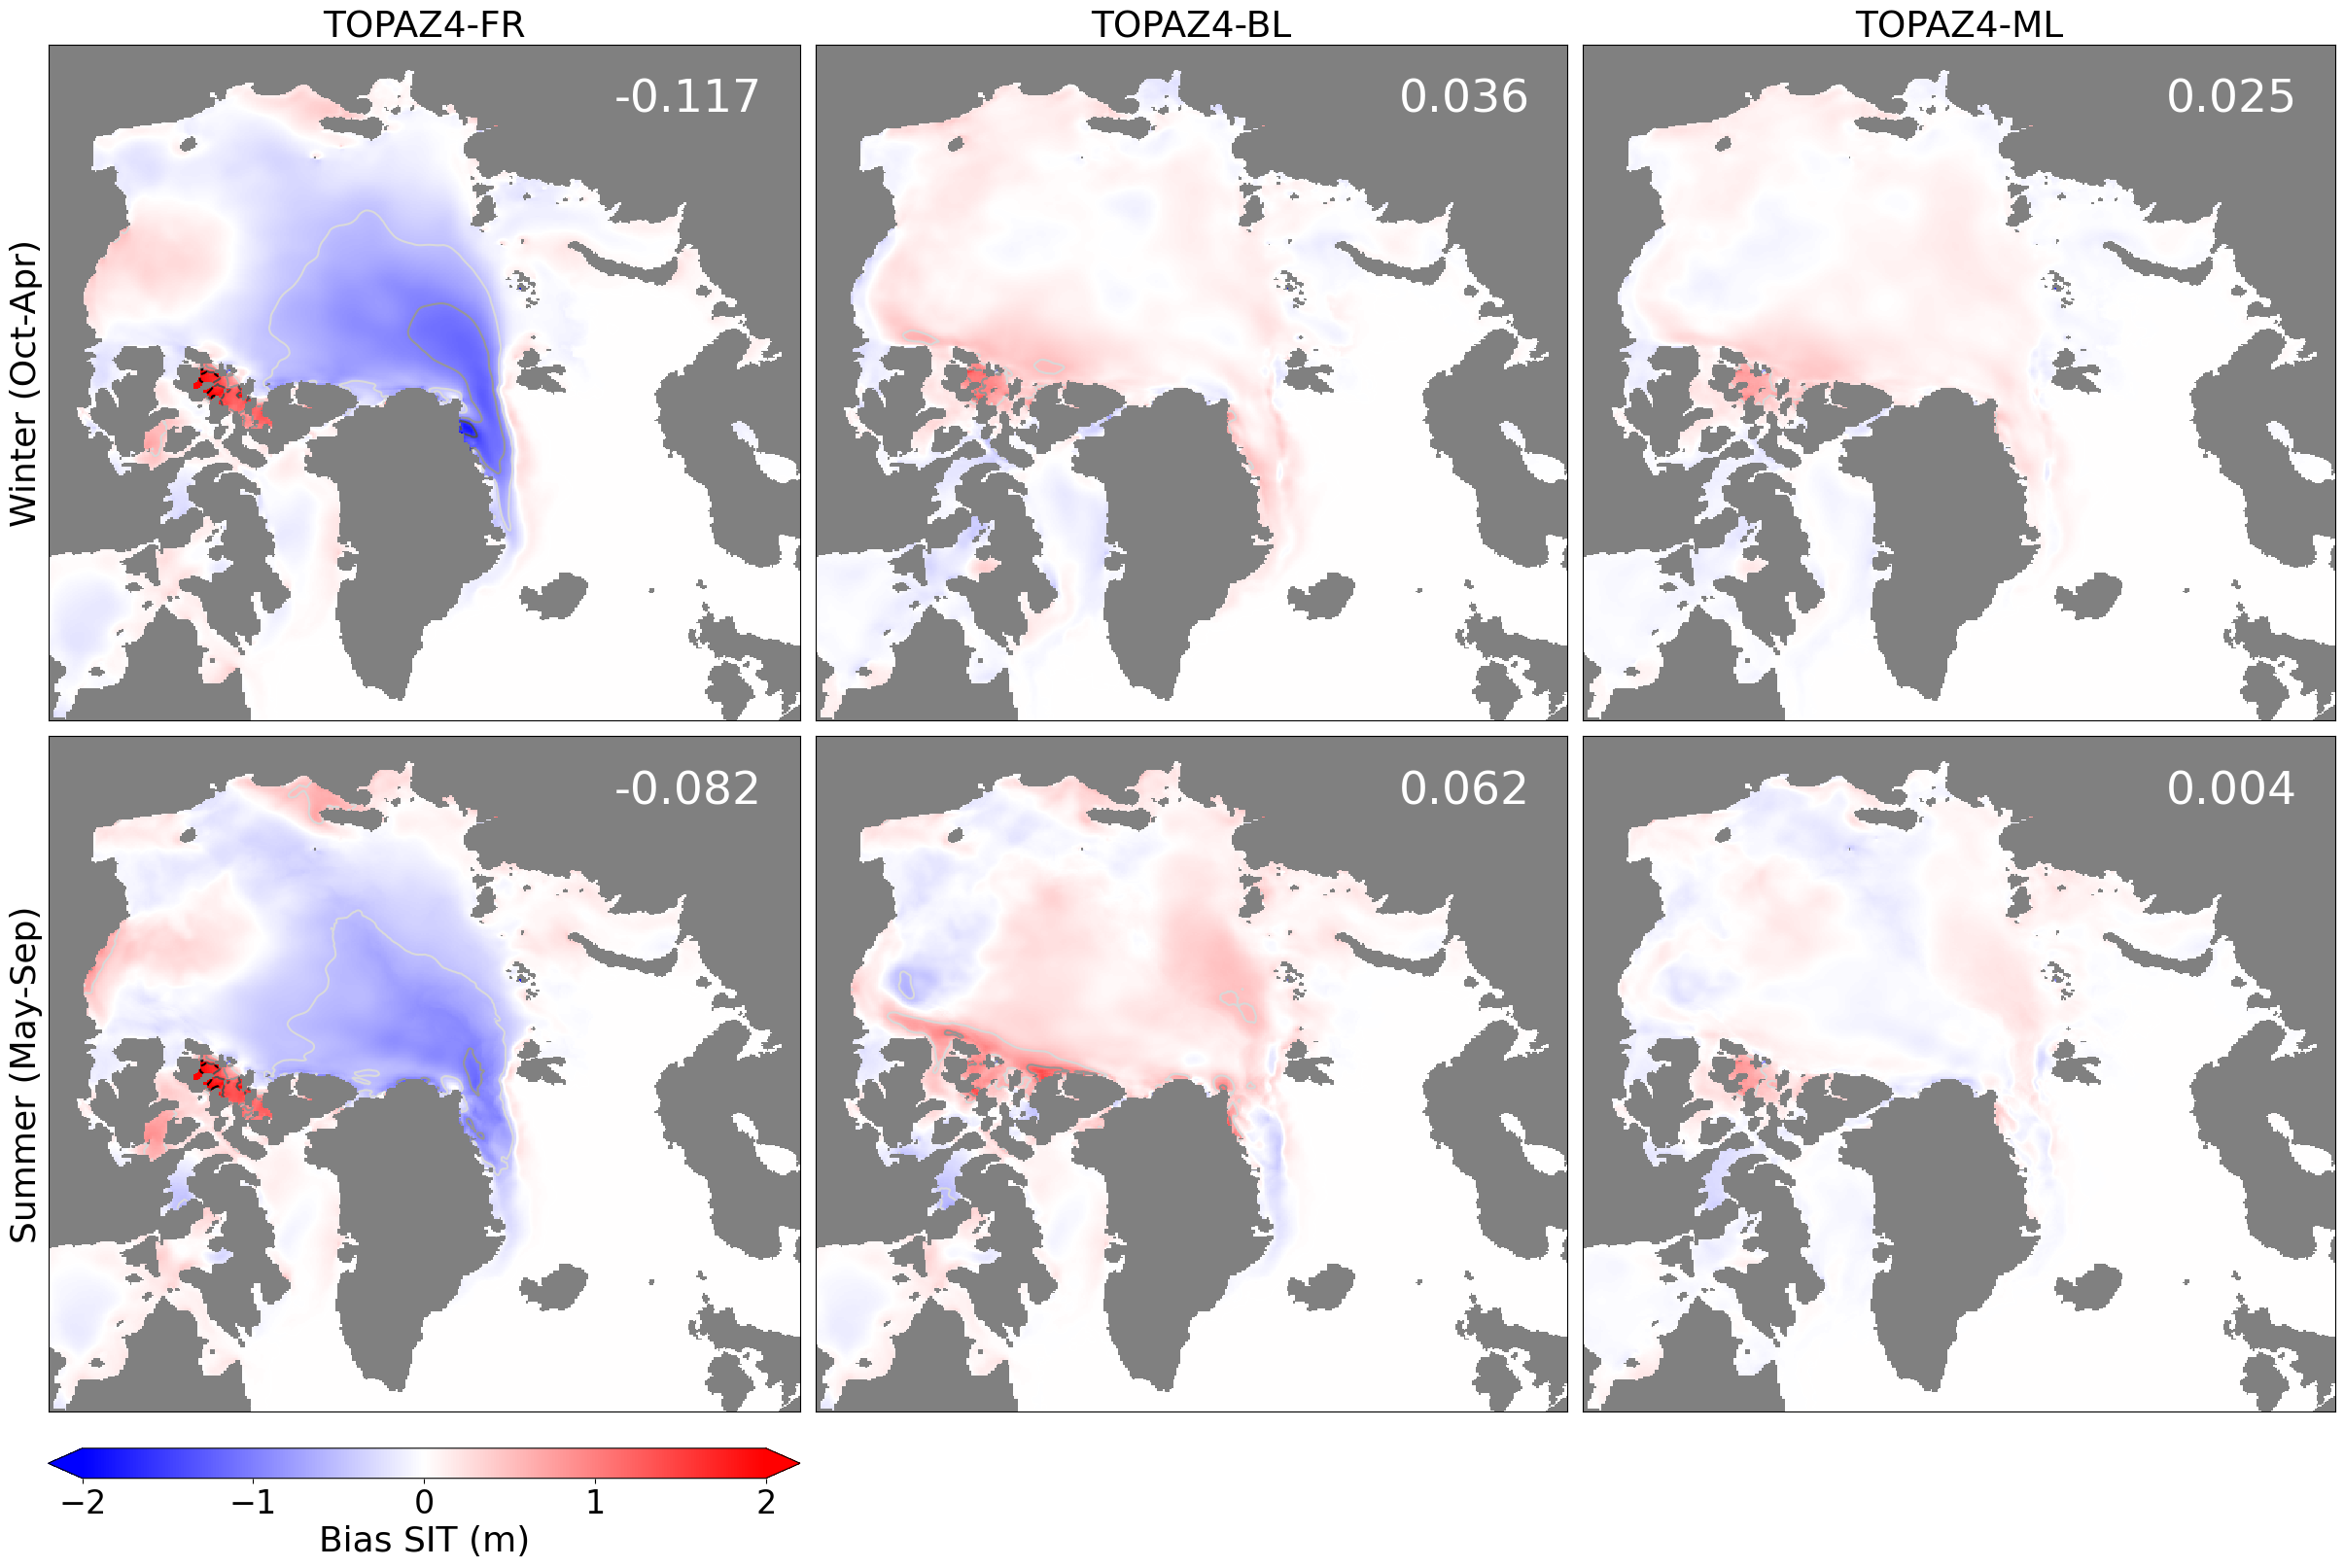

In [31]:
draw_frz_mlt_bias(bms_fr_a, bms_bl_a, bms_ml_a, odir=odir, savefig=True, showfig=True)

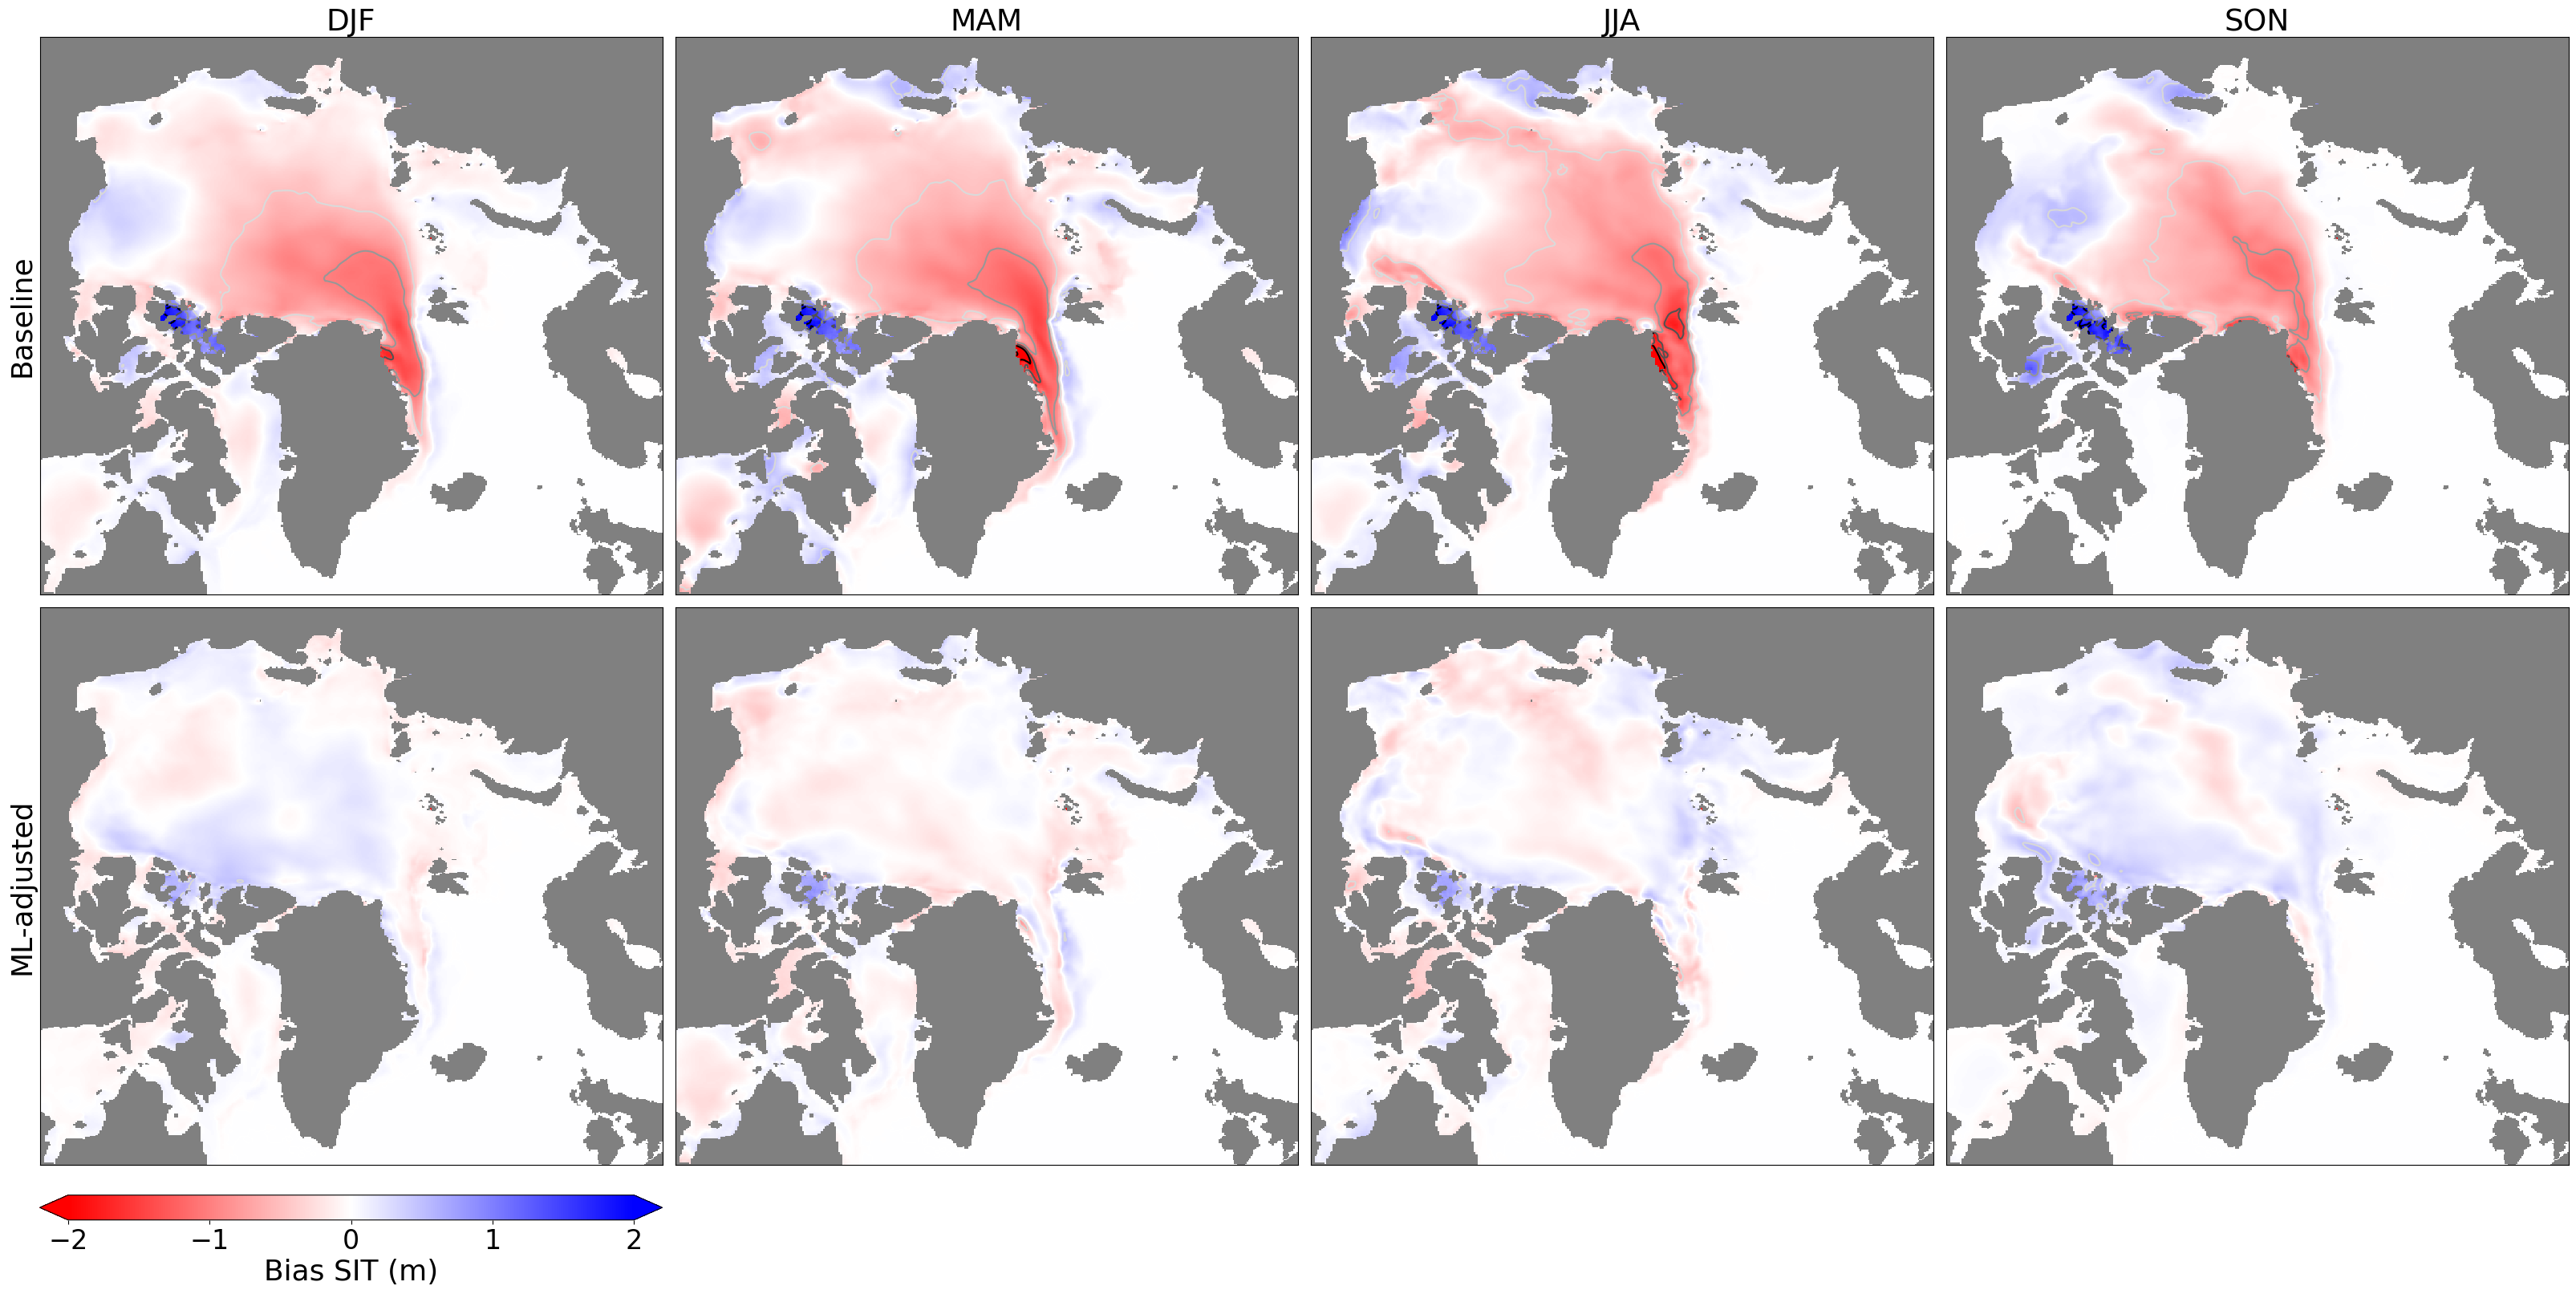

In [33]:
draw_seasonal_bias(bms_fr_a, bms_ml_a, odir=odir, savefig=False, showfig=True)

Saved as : /scratch/project_465000269/edelleo1/Leo/results/lstm_230919-151834/figures/SITbias_seasonal_bl_2011_2013.png


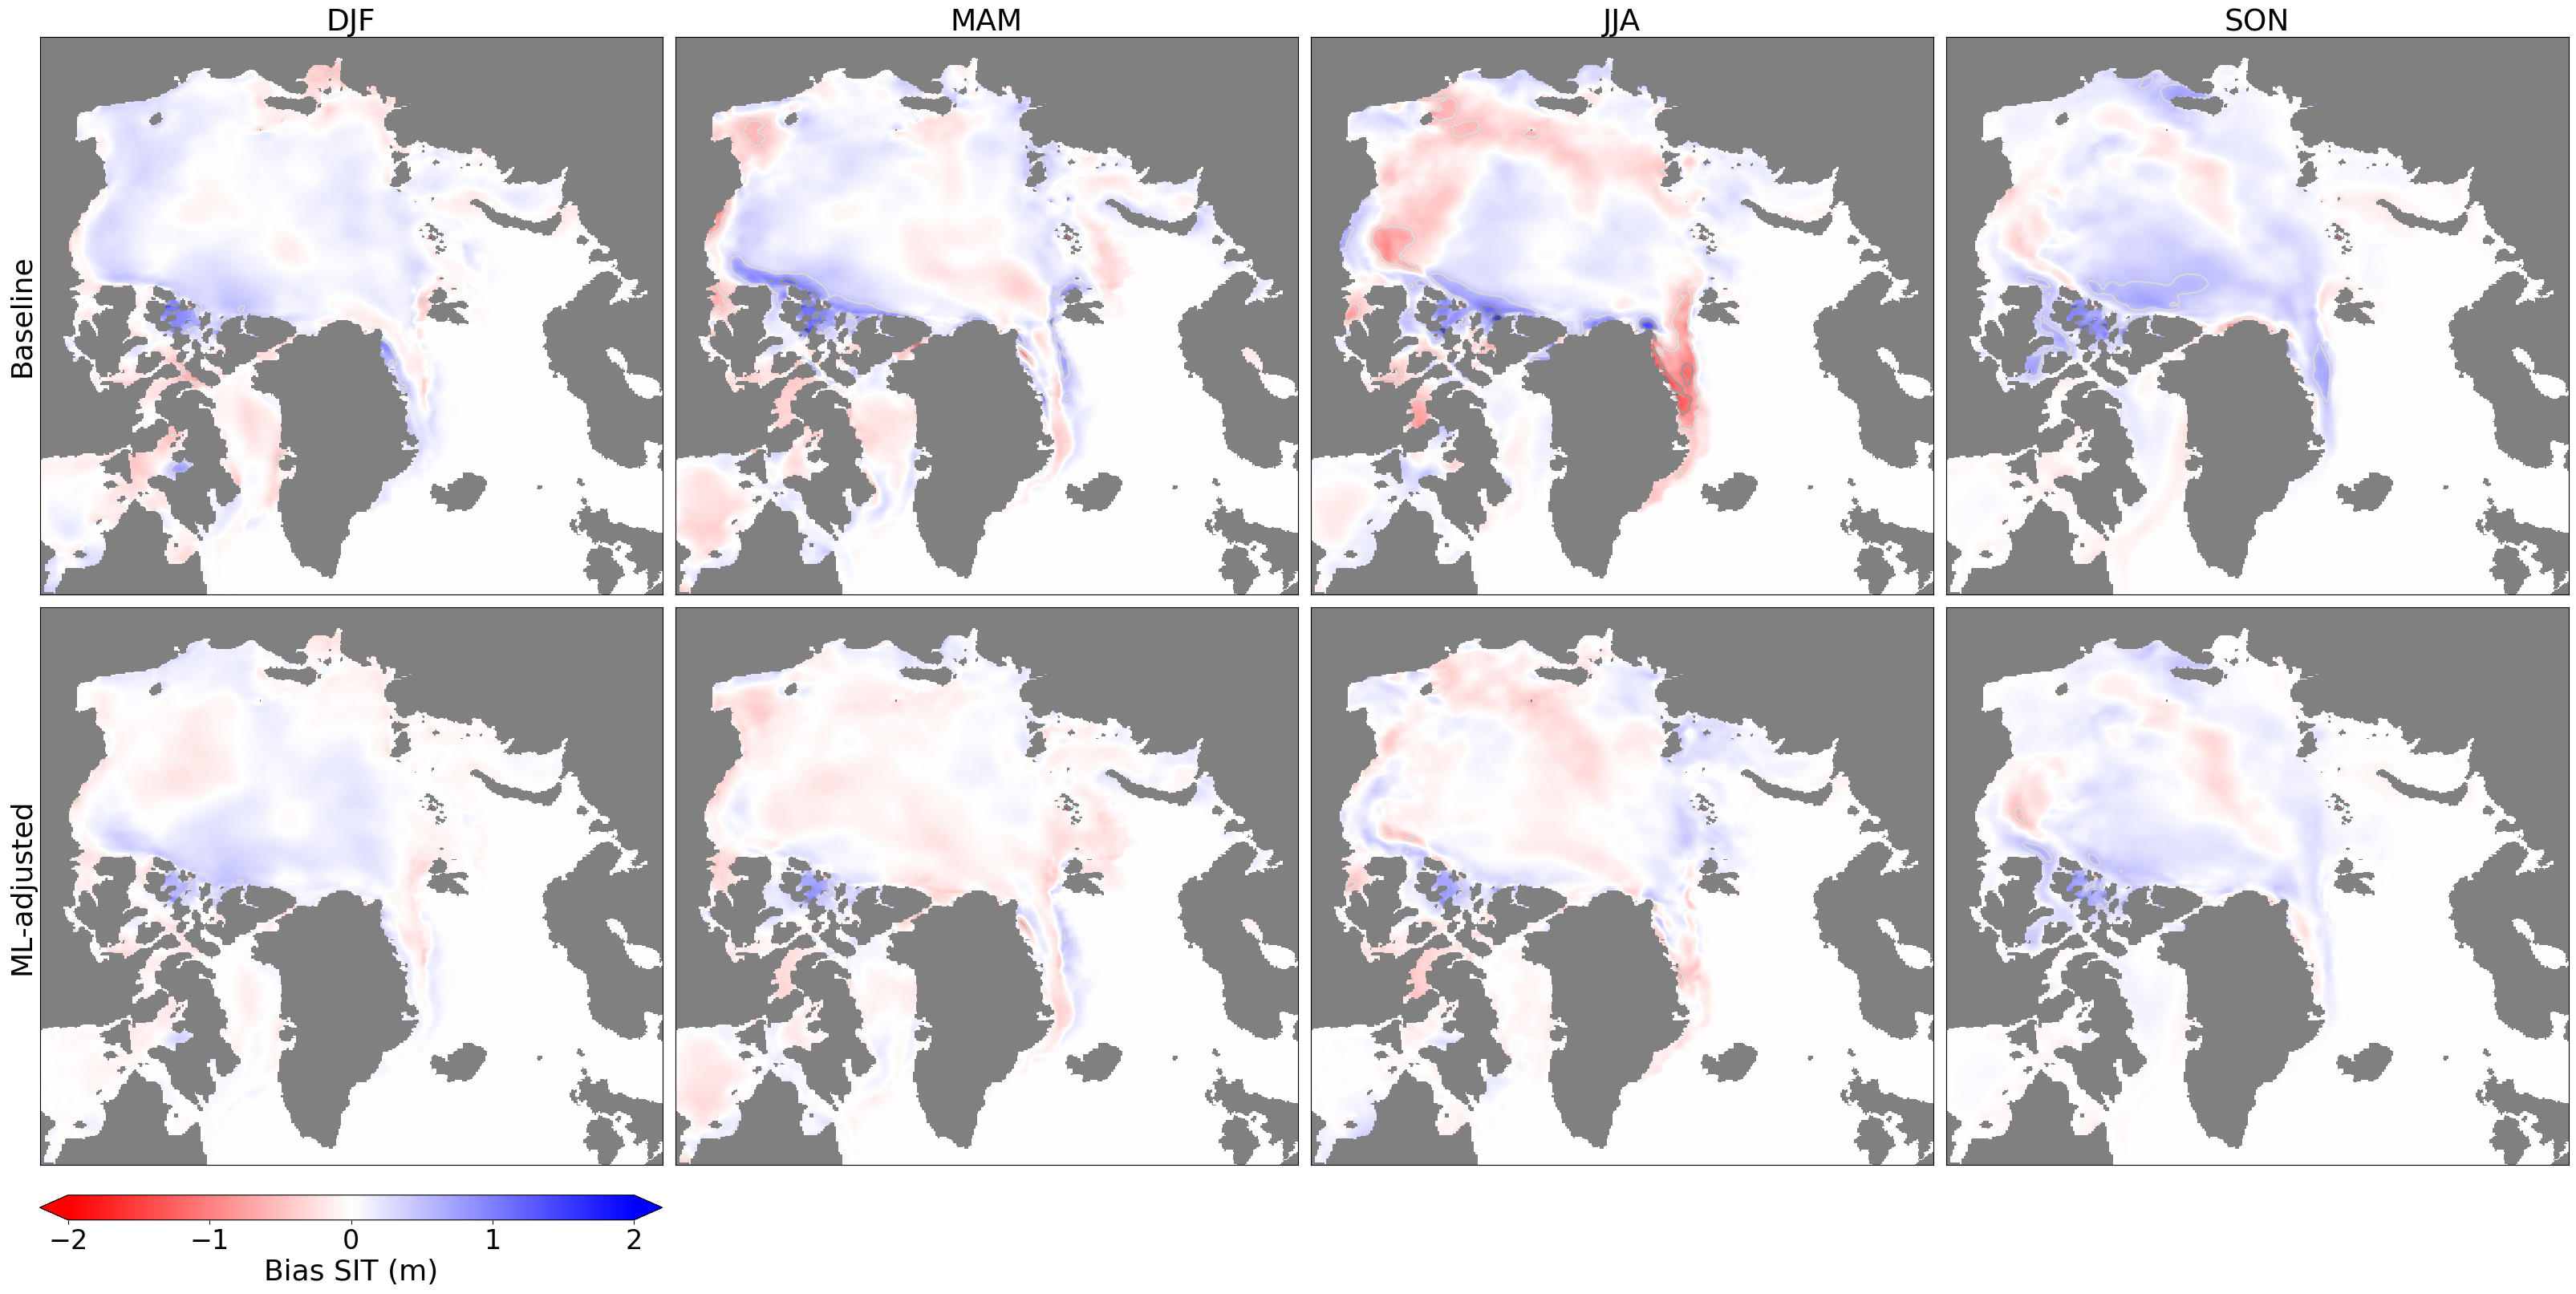

In [29]:
draw_seasonal_bias(bms_bl_a, bms_ml_a, odir=odir, savefig=True, showfig=True)

Saved as : /scratch/project_465000269/edelleo1/Leo/results/lstm_230919-151834/figures/SITbias_seasonal_bl_fr_2011_2013.png


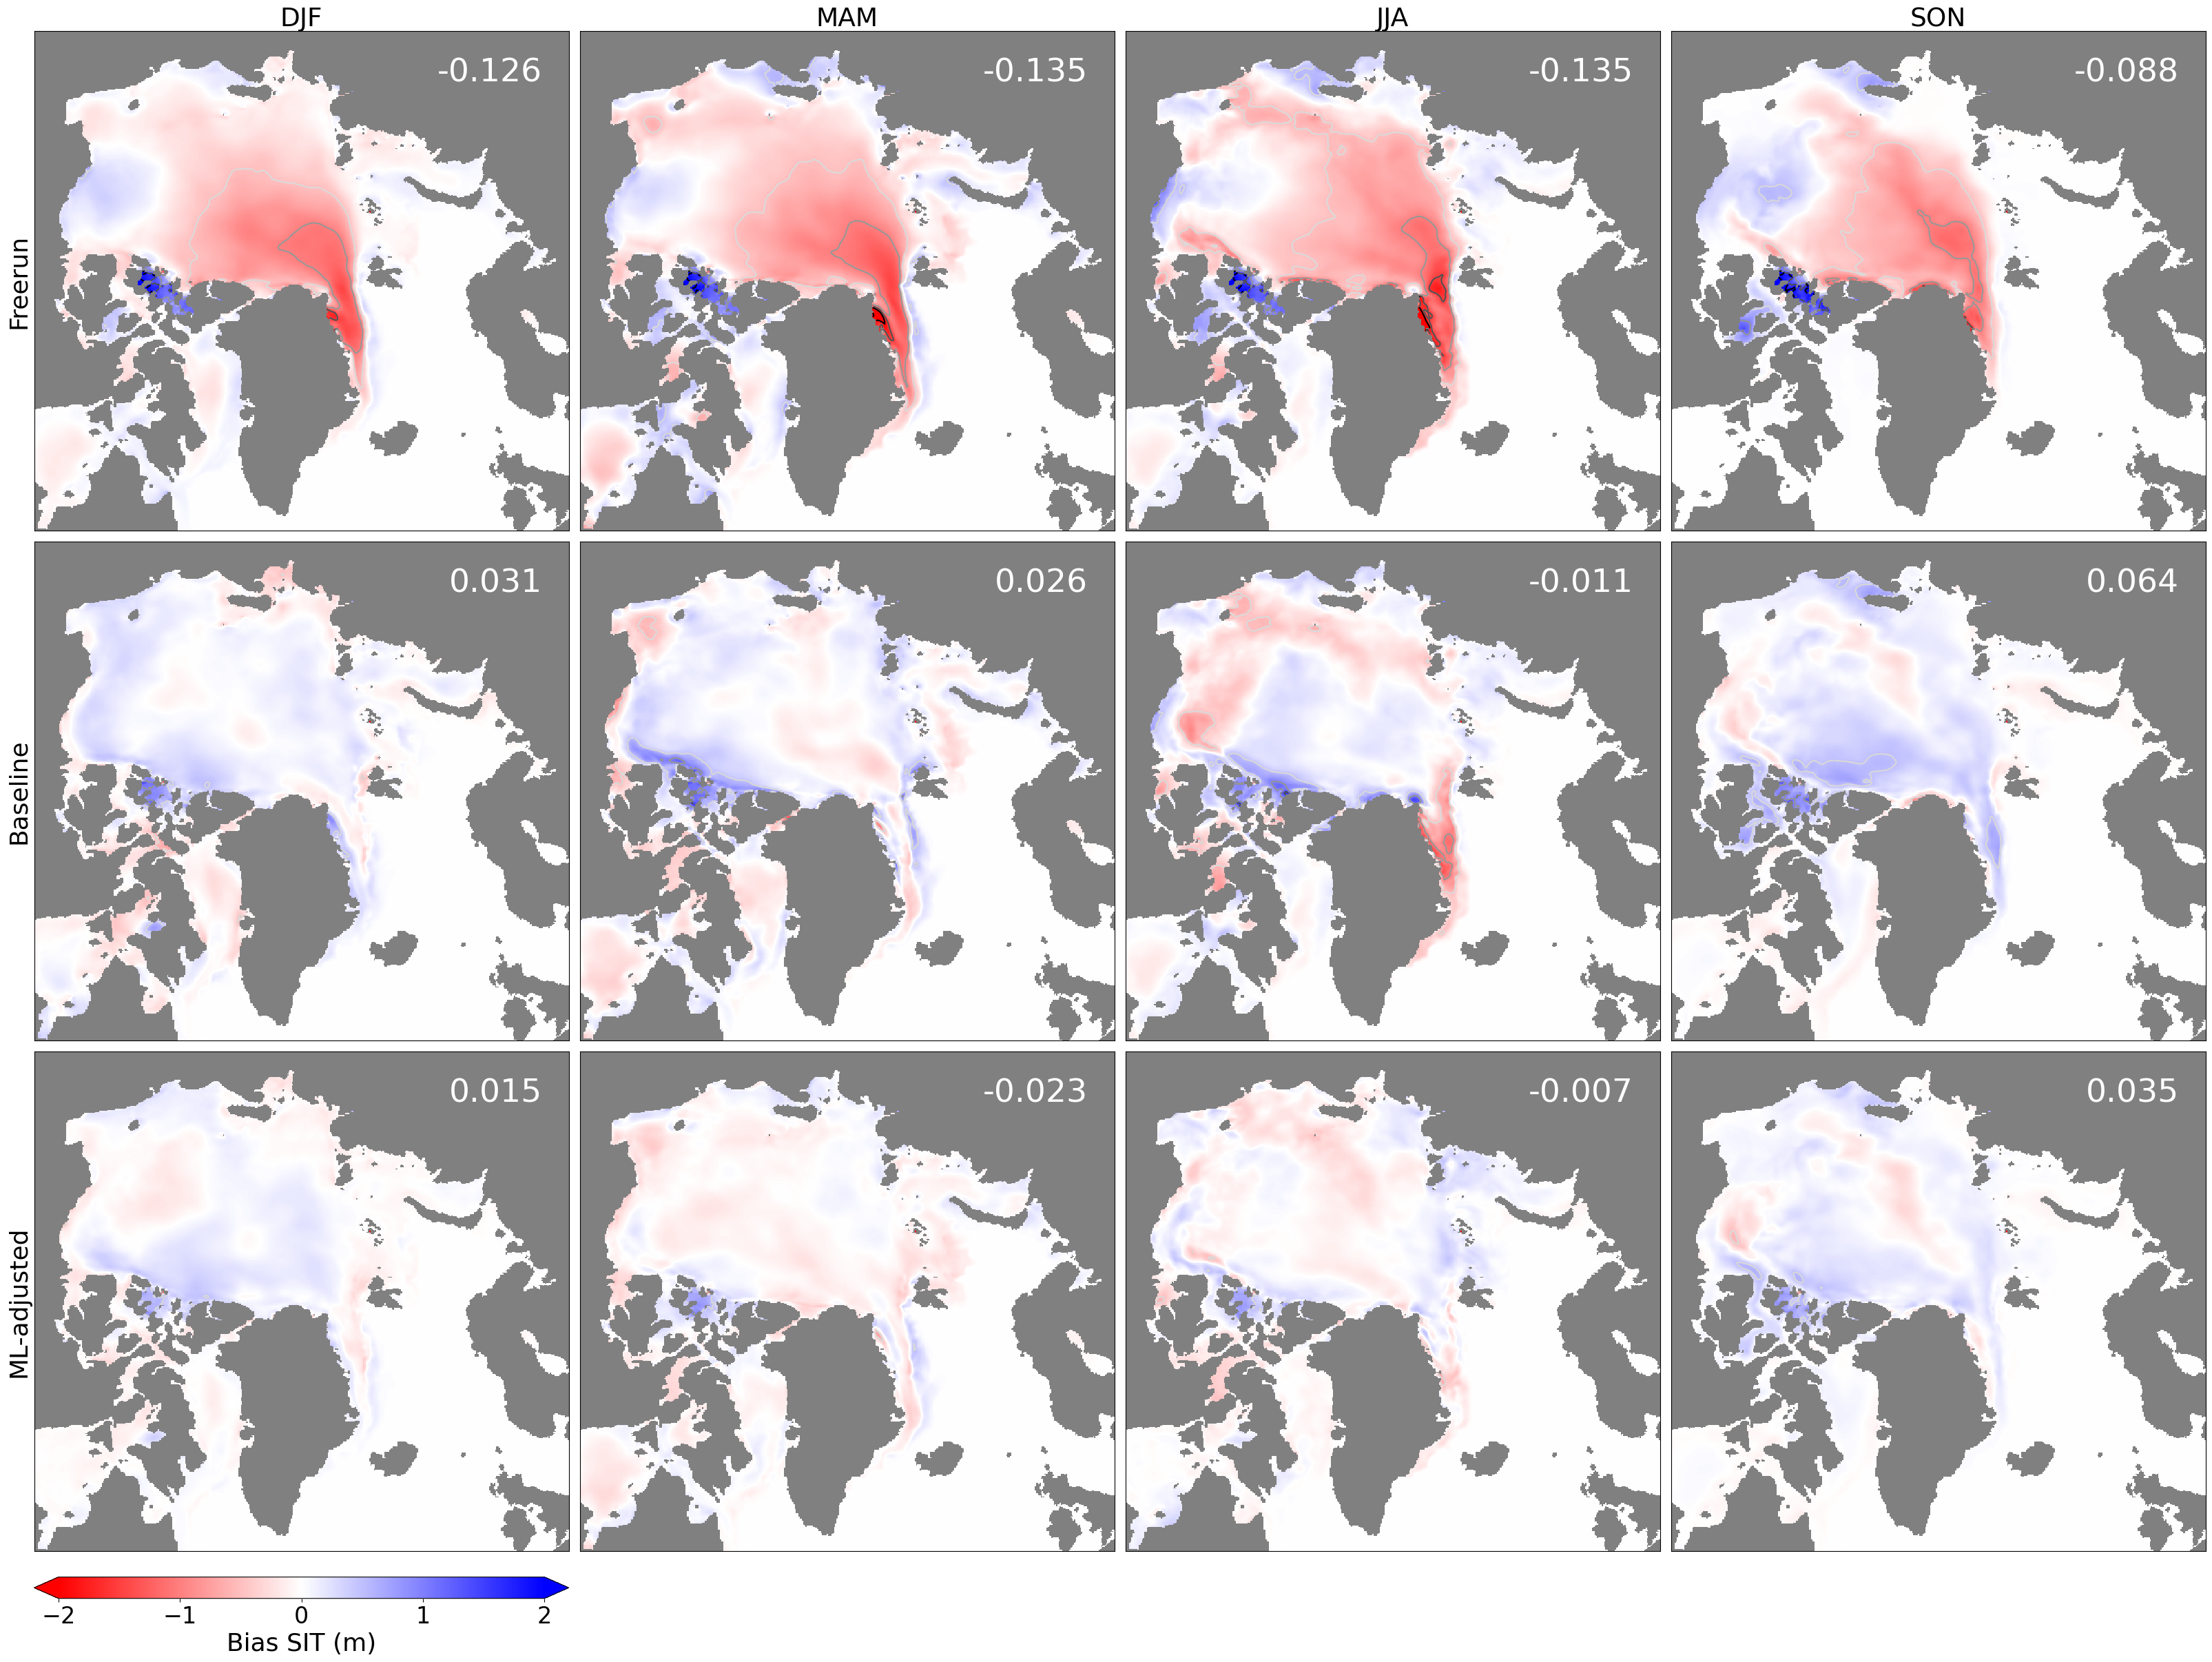

In [54]:
draw_seasonal_3_bias(bms_fr_a, bms_bl_a, bms_ml_a, odir=odir, savefig=True, showfig=True)

In [12]:
def draw_seasonal_bias(b1, b2, odir='', showfig=True, savefig=False):
    '''Plot 2x4 subplots with seasonal error
    
    
        Parameters:
        -----------

    '''
    
    fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(8*4,8*2), constrained_layout=True)

    season_str = ['DJF', 'MAM', 'JJA', 'SON']
    
     # diverent colormap [black - white - black]
    import matplotlib.colors as colors
    colors_over = plt.get_cmap('Greys')(np.linspace(0, 1, 256))
    all_colors = np.vstack((colors_over[::-1], colors_over)) # colors_over))
    mymap = colors.LinearSegmentedColormap.from_list('mymap', all_colors)
    
    # pcolormesh
    cmap_extend = 'both'
    cmap = plt.get_cmap('bwr_r')
    
    # contour
    levels = np.arange(-2, 2.5, 0.5)
#     cl = Xe_mm.isel(month=0).plot.contour(ax=axes[0][0], levels=levels, vmin=-3, vmax=3, add_colorbar=False, cmap=mymap, center=0)
#     plt.clabel(cl, fontsize=18, inline=1)
    

    
#     axes[0][0].set_title(f'{months[0]}')
    
    ax_fl = axes.flatten()
    for idx in range(4):
        ax = ax_fl[idx]
        ax2 = ax_fl[idx+4]
        if idx ==0:  # with colorbar
            b1.isel(dim_0=idx).plot(ax=ax, add_colorbar=False, cmap=cmap, vmin=-2, vmax=2)
            b2.isel(dim_0=idx).plot(ax=ax2, add_colorbar=True, cmap=cmap, vmin=-2, vmax=2,
                                    cbar_kwargs={'orientation':'horizontal', 'aspect':25,
                                                 'label':'Bias SIT (m)',
                                                'extend':'both', 'ticks':[-2,-1,0,1,2]})
        else:  # without
            b1.isel(dim_0=idx).plot(ax=ax, add_colorbar=False, cmap=cmap, vmin=-2, vmax=2)
            b2.isel(dim_0=idx).plot(ax=ax2, add_colorbar=False, cmap=cmap, vmin=-2, vmax=2)
            

        cl = b1.isel(dim_0=idx).plot.contour(ax=ax, levels=levels, vmin=-2, vmax=2, add_colorbar=False, cmap=mymap)
        cl = b2.isel(dim_0=idx).plot.contour(ax=ax2, levels=levels, vmin=-2, vmax=2, add_colorbar=False, cmap=mymap)
            
#         levels = np.arange(-2, 2.5, 0.5)
#         cl = Xe_mm.isel(month=idx).plot.contour(ax=ax, levels=levels, vmin=-3, vmax=3, add_colorbar=False, cmap=mymap, center=0)
#         ax.clabel(cl, fontsize=18, inline=1)
        
        ax.set_title(f'{season_str[idx]}')

    for ax in ax_fl:
        ax.set_facecolor('grey')
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)
        
    ax_fl[0].set_ylabel('Baseline')  # Freerun')
    ax_fl[4].set_ylabel('ML-adjusted')

    modif_plot.resize(fig, s=24, rx=0)
    
    if savefig:
        ofile = f'{odir}SITbias_seasonal_bl_2011_2013.png'    
        plt.savefig(f"{ofile}", dpi=300, facecolor='white')
        print(f'Saved as : {ofile}')
    
    if showfig:
        plt.show()
    
    plt.close()    
    
    

In [29]:
def draw_frz_mlt_bias(b1, b2, b3, odir='', showfig=True, savefig=False):
    '''Plot 2x3 subplots with seasonal error
    
    
        Parameters:
        -----------

    '''
    
    fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(8*3,8*2), constrained_layout=True)

    season_str = ['Winter (Oct-Apr)', 'Summer (May-Sep)']
    
     # diverent colormap [black - white - black]
    import matplotlib.colors as colors
    colors_over = plt.get_cmap('Greys')(np.linspace(0, 1, 256))
    all_colors = np.vstack((colors_over[::-1], colors_over)) # colors_over))
    mymap = colors.LinearSegmentedColormap.from_list('mymap', all_colors)
    
    # pcolormesh
    cmap_extend = 'both'
    cmap = plt.get_cmap('bwr')
    
    # contour
    levels = np.arange(-2, 2.5, 0.5)
#     cl = Xe_mm.isel(month=0).plot.contour(ax=axes[0][0], levels=levels, vmin=-3, vmax=3, add_colorbar=False, cmap=mymap, center=0)
#     plt.clabel(cl, fontsize=18, inline=1)
    

    
#     axes[0][0].set_title(f'{months[0]}')
    
    ax_fl = axes.flatten()
    for idx, ax_idx in zip(range(2), [0,3]):
        ax = ax_fl[ax_idx]
        ax2 = ax_fl[ax_idx+1]
        ax3 = ax_fl[ax_idx+2]
        
        if idx ==1:  # with colorbar
            b1.isel(dim_0=idx).plot(ax=ax, add_colorbar=True, cmap=cmap, vmin=-2, vmax=2,
                                    cbar_kwargs={'orientation':'horizontal', 'aspect':25,
                                                 'label':'Bias SIT (m)',
                                                'extend':'both', 'ticks':[-2,-1,0,1,2]})
            b2.isel(dim_0=idx).plot(ax=ax2, add_colorbar=False, cmap=cmap, vmin=-2, vmax=2)
            b3.isel(dim_0=idx).plot(ax=ax3, add_colorbar=False, cmap=cmap, vmin=-2, vmax=2)
                                    
        else:  # without
            b1.isel(dim_0=idx).plot(ax=ax, add_colorbar=False, cmap=cmap, vmin=-2, vmax=2)
            b2.isel(dim_0=idx).plot(ax=ax2, add_colorbar=False, cmap=cmap, vmin=-2, vmax=2)
            b3.isel(dim_0=idx).plot(ax=ax3, add_colorbar=False, cmap=cmap, vmin=-2, vmax=2)
            
            

        cl = b1.isel(dim_0=idx).plot.contour(ax=ax, levels=levels, vmin=-2, vmax=2, add_colorbar=False, cmap=mymap)
        cl = b2.isel(dim_0=idx).plot.contour(ax=ax2, levels=levels, vmin=-2, vmax=2, add_colorbar=False, cmap=mymap)
        cl = b3.isel(dim_0=idx).plot.contour(ax=ax3, levels=levels, vmin=-2, vmax=2, add_colorbar=False, cmap=mymap)


        # annotate
        ax.annotate(f'{b1.isel(dim_0=idx).mean().data:0.3f}', xy=(.95,.9), xycoords='axes fraction', color='w', ha='right', fontsize=34)
        ax2.annotate(f'{b2.isel(dim_0=idx).mean().data:0.3f}', xy=(.95,.9), xycoords='axes fraction', color='w', ha='right', fontsize=34)
        ax3.annotate(f'{b3.isel(dim_0=idx).mean().data:0.3f}', xy=(.95,.9), xycoords='axes fraction', color='w', ha='right', fontsize=34)
        
        
        
    for ax in ax_fl:
        ax.set_facecolor('grey')
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)
        
    ax_fl[0].set_title('TOPAZ4-FR')
    ax_fl[1].set_title('TOPAZ4-BL')
    ax_fl[2].set_title('TOPAZ4-ML')

    ax_fl[0].set_ylabel(f'{season_str[0]}')
    axes[1][0].set_ylabel(f'{season_str[1]}')
    
    
    
    modif_plot.resize(fig, s=24, rx=0, do_annotation=False)
    
    if savefig:
        ofile = f'{odir}SITbias_frz_mlt_bl_fr_2011_2013.png'    
        plt.savefig(f"{ofile}", dpi=150, facecolor='white')
        print(f'Saved as : {ofile}')
    
    if showfig:
        plt.show()
    
    plt.close()    
    
    

In [52]:
def draw_seasonal_3_bias(b1, b2, b3, odir='', showfig=True, savefig=False):
    '''Plot 3x4 subplots with seasonal error
    
    
        Parameters:
        -----------

    '''
    
    fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(8*4,8*3), constrained_layout=True)

    season_str = ['DJF', 'MAM', 'JJA', 'SON']
    
     # diverent colormap [black - white - black]
    import matplotlib.colors as colors
    colors_over = plt.get_cmap('Greys')(np.linspace(0, 1, 256))
    all_colors = np.vstack((colors_over[::-1], colors_over)) # colors_over))
    mymap = colors.LinearSegmentedColormap.from_list('mymap', all_colors)
    
    # pcolormesh
    cmap_extend = 'both'
    cmap = plt.get_cmap('bwr_r')
    
    # contour
    levels = np.arange(-2, 2.5, 0.5)
#     cl = Xe_mm.isel(month=0).plot.contour(ax=axes[0][0], levels=levels, vmin=-3, vmax=3, add_colorbar=False, cmap=mymap, center=0)
#     plt.clabel(cl, fontsize=18, inline=1)
    

    
#     axes[0][0].set_title(f'{months[0]}')
    
    ax_fl = axes.flatten()
    for idx in range(4):
        ax = ax_fl[idx]
        ax2 = ax_fl[idx+4]
        ax3 = ax_fl[idx+8]
        
        if idx ==0:  # with colorbar
            b1.isel(dim_0=idx).plot(ax=ax, add_colorbar=False, cmap=cmap, vmin=-2, vmax=2)
            b2.isel(dim_0=idx).plot(ax=ax2, add_colorbar=False, cmap=cmap, vmin=-2, vmax=2)
            b3.isel(dim_0=idx).plot(ax=ax3, add_colorbar=True, cmap=cmap, vmin=-2, vmax=2,
                                    cbar_kwargs={'orientation':'horizontal', 'aspect':25,
                                                 'label':'Bias SIT (m)',
                                                'extend':'both', 'ticks':[-2,-1,0,1,2]})
        else:  # without
            b1.isel(dim_0=idx).plot(ax=ax, add_colorbar=False, cmap=cmap, vmin=-2, vmax=2)
            b2.isel(dim_0=idx).plot(ax=ax2, add_colorbar=False, cmap=cmap, vmin=-2, vmax=2)
            b3.isel(dim_0=idx).plot(ax=ax3, add_colorbar=False, cmap=cmap, vmin=-2, vmax=2)
            
            

        cl = b1.isel(dim_0=idx).plot.contour(ax=ax, levels=levels, vmin=-2, vmax=2, add_colorbar=False, cmap=mymap)
        cl = b2.isel(dim_0=idx).plot.contour(ax=ax2, levels=levels, vmin=-2, vmax=2, add_colorbar=False, cmap=mymap)
        cl = b3.isel(dim_0=idx).plot.contour(ax=ax3, levels=levels, vmin=-2, vmax=2, add_colorbar=False, cmap=mymap)

        ax.set_title(f'{season_str[idx]}')

        # annotate
        ax.annotate(f'{b1.isel(dim_0=idx).mean().data:0.3f}', xy=(.95,.9), xycoords='axes fraction', color='w', ha='right', fontsize=34)
        ax2.annotate(f'{b2.isel(dim_0=idx).mean().data:0.3f}', xy=(.95,.9), xycoords='axes fraction', color='w', ha='right', fontsize=34)
        ax3.annotate(f'{b3.isel(dim_0=idx).mean().data:0.3f}', xy=(.95,.9), xycoords='axes fraction', color='w', ha='right', fontsize=34)
        
        
        
    for ax in ax_fl:
        ax.set_facecolor('grey')
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)
        
    ax_fl[0].set_ylabel('Freerun')    
    ax_fl[4].set_ylabel('Baseline')
    ax_fl[8].set_ylabel('ML-adjusted')

    
    modif_plot.resize(fig, s=24, rx=0, do_annotation=False)
    
    if savefig:
        ofile = f'{odir}SITbias_seasonal_bl_fr_2011_2013.png'    
        plt.savefig(f"{ofile}", dpi=300, facecolor='white')
        print(f'Saved as : {ofile}')
    
    if showfig:
        plt.show()
    
    plt.close()    
    
    

In [42]:
print('DJF')
print(f'{bms_fr_a.isel(dim_0=0).mean().data:0.3f}')
print(f'{bms_bl_a.isel(dim_0=0).mean().data:0.3f}')
print(f'{bms_ml_a.isel(dim_0=0).mean().data:0.3f}')

DJF
-0.126
0.031
0.015


In [33]:
print('MAM')
print(f'{bms_fr_a.isel(dim_0=1).mean().data:0.3f}')
print(f'{bms_bl_a.isel(dim_0=1).mean().data:0.3f}')
print(f'{bms_ml_a.isel(dim_0=1).mean().data:0.3f}')

MAM
-0.135
0.026
-0.023


In [34]:
print('JJA')
print(f'{bms_fr_a.isel(dim_0=2).mean().data:0.3f}')
print(f'{bms_bl_a.isel(dim_0=2).mean().data:0.3f}')
print(f'{bms_ml_a.isel(dim_0=2).mean().data:0.3f}')

JJA
-0.135
-0.011
-0.007


In [35]:
print('SON')
print(f'{bms_fr_a.isel(dim_0=3).mean().data:0.3f}')
print(f'{bms_bl_a.isel(dim_0=3).mean().data:0.3f}')
print(f'{bms_ml_a.isel(dim_0=3).mean().data:0.3f}')

SON
-0.088
0.064
0.035
